In [ ]:
#Suppress display of warnings
import warnings
warnings.filterwarnings("ignore")
#Pandas is used for data manipulation and analysis.
import pandas as pd
#Numpy is used for mathematical operation and large, multi-dimensional arrays and matrices.
import numpy as np
#Matplotlib is used to visualize data and make 2D and 3D plots and its built in numpy.
import matplotlib.pyplot as plt
import seaborn as sns
#Import various functions to perform calculations.
from sklearn.model_selection import train_test_split
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
bank = pd.read_csv("new_train[1].csv")
test = pd.read_csv("new_test[1].csv")
new_train = pd.read_csv("new_train.csv")
bank

In [ ]:
bank.head(30)

In [ ]:
bank.info()

In [ ]:
bank.tail(30)

In [ ]:
bank.columns

In [ ]:
bank.describe

In [ ]:
bank.ndim

In [ ]:
bank.dtypes

In [ ]:
bank.shape

In [ ]:
bank.isna().sum()

In [ ]:
bank.isnull().sum()

In [3]:
bank = bank.drop_duplicates()

In [ ]:
bank.duplicated().sum()

In [4]:
#Extracting Categorical Columns:
catFeatures = [col for col in bank.columns if col in
               bank.select_dtypes(include=object).columns]

from sklearn.preprocessing import LabelEncoder
X = bank
#Encoding Categorical Data
labelEncode = LabelEncoder()

#Iterating over each categorical feature:
for col in catFeatures:
    #storing its numerical values
    X[col] = labelEncode.fit_transform(bank[col])

In [5]:
y=X[["y"]]
X=X.drop(["y",'previous','pdays'],axis=1)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,1
1,37,2,1,6,0,0,0,1,7,4,202,2,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,1
4,59,5,0,6,0,0,0,0,4,3,368,2,1


In [7]:
models = {
    "           Logistic Regression":LogisticRegression(),
    "           Gaussian Naive Bayes":GaussianNB(),
    "           K-Nearest Neighbors":KNeighborsClassifier(),
    "           Support Vector Machine":SVC(),
    "           Random Forest":RandomForestClassifier()    
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name +" trained")

           Logistic Regression trained
           Gaussian Naive Bayes trained
           K-Nearest Neighbors trained
           Support Vector Machine trained
           Random Forest trained


In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, Y_test)*100))

Confusion Matrix
[[7154  124]
 [ 773  185]]


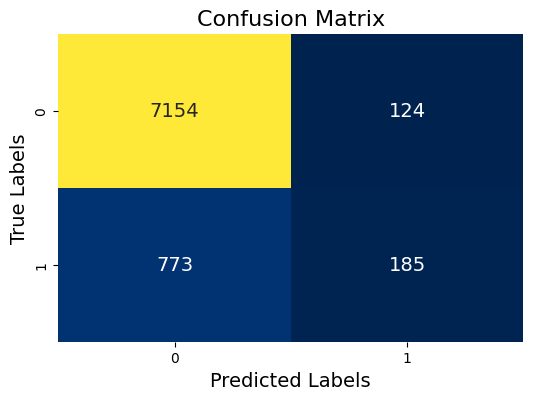

Confusion Matrix
[[6665  613]
 [ 453  505]]


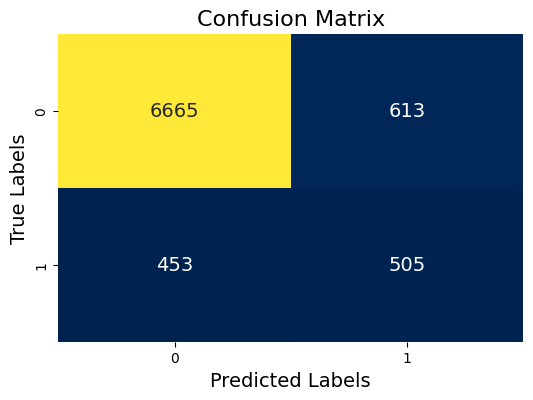

Confusion Matrix
[[7042  236]
 [ 718  240]]


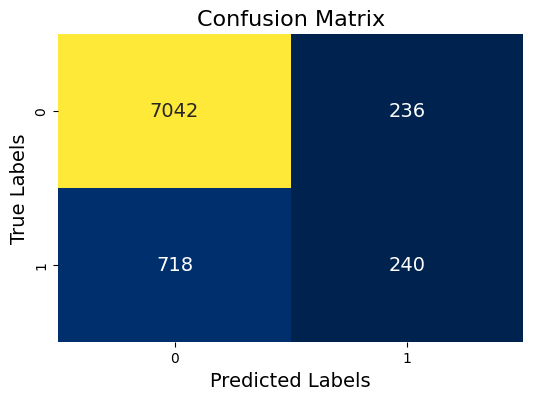

Confusion Matrix
[[7158  120]
 [ 778  180]]


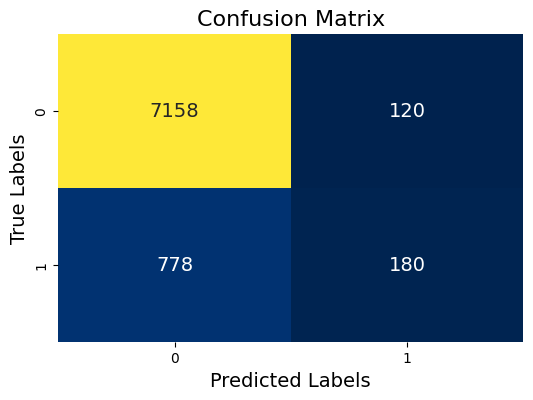

Confusion Matrix
[[7058  220]
 [ 576  382]]


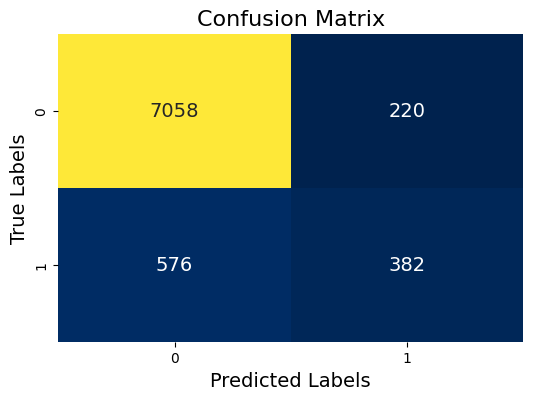

In [8]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    #PRINTING CONFUSION MATRIX
    print("Confusion Matrix")
    cm = confusion_matrix(Y_test, y_pred)
    print(cm)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False, annot_kws={'size' : 14})
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_re, y_re = sm.fit_resample(X,y)
X_train, X_test, Y_train, Y_test = train_test_split(X_re, y_re, test_size=0.25)
X.head()

In [ ]:
sns.countplot(x = 'y', data=y)
plt.title("Before Applying SMOTE")

plt.show()

In [ ]:
sns.countplot(x = 'y', data=y_re)
plt.title("After Applying SMOTE")

plt.show()

In [ ]:
models = {
    "           Logistic Regression":LogisticRegression(),
    "           Gaussian Naive Bayes":GaussianNB(),
    "           K-Nearest Neighbors":KNeighborsClassifier(),
    "           Support Vector Machine":SVC(),
    "           Random Forest":RandomForestClassifier()    
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name +" trained")

In [ ]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, Y_test)*100))

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    #PRINTING CONFUSION MATRIX
    print("Confusion Matrix")
    cm = confusion_matrix(Y_test, y_pred)
    print(cm)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False, annot_kws={'size' : 14})
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()